In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Read in the csv file
df=pd.read_csv('/Users/robertpatton/Desktop/Desktop - Robert’s MacBook Pro/D214/Hospital_Ratings.csv')

In [3]:
#Examine data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25974 entries, 0 to 25973
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 25974 non-null  int64  
 1   County               25974 non-null  object 
 2   hospital             25974 non-null  object 
 3   OSHPDID              25974 non-null  int64  
 4   system               25974 non-null  object 
 5   Type of Report       25974 non-null  object 
 6   Performance Measure  25974 non-null  object 
 7   # of Adverse Events  18552 non-null  float64
 8   # of Cases           18552 non-null  float64
 9   Risk-adjusted Rate   18438 non-null  float64
 10  Hospital Ratings     18552 non-null  object 
 11  Longitude            25876 non-null  float64
 12  Latitude             25876 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 2.6+ MB


In [4]:
#Examine first five rows
df.head(10)

,Year,County,hospital,OSHPDID,system,Type of Report,Performance Measure,# of Adverse Events,# of Cases,Risk-adjusted Rate,Hospital Ratings,Longitude,Latitude
0,2016,Alameda,Alameda Hospital,106010735,Alameda Health System,IMI,Pneumonia,2.0,76.0,3.0,As Expected,-122.253,37.76266
1,2016,Alameda,Alameda Hospital,106010735,Alameda Health System,IMI,Heart Failure,2.0,111.0,2.1,As Expected,-122.253,37.76266
2,2016,Alameda,Alameda Hospital,106010735,Alameda Health System,IMI,GI Hemorrhage,5.0,83.0,4.6,As Expected,-122.253,37.76266
3,2016,Alameda,Alameda Hospital,106010735,Alameda Health System,IMI,PCI,NaN,NaN,NaN,NaN,-122.253,37.76266
4,2016,Alameda,Alameda Hospital,106010735,Alameda Health System,IMI,Acute Stroke Subarachnoid,NaN,NaN,NaN,NaN,-122.253,37.76266
5,2016,Alameda,Alameda Hospital,106010735,Alameda Health System,IMI,Acute Stroke Hemorrhagic,5.0,9.0,48.9,Worse,-122.253,37.76266
6,2016,Alameda,Alameda Hospital,106010735,Alameda Health System,IMI,AMI,3.0,17.0,16.1,As Expected,-122.253,37.76266
7,2016,Alameda,Alameda Hospital,106010735,Alameda Health System,IMI,Acute Stroke,9.0,74.0,23.6,Worse,-122.253,37.76266
8,2016,Alameda,Alameda Hospital,106010735,Alameda Health System,IMI,Acute Stroke Ischemic,4.0,65.0,15.2,As Expected,-122.253,37.76266
9,2016,Alameda,Alameda Hospital,106010735,Alameda Health System,IMI,Carotid Endarterectomy,NaN,NaN,NaN,NaN,-122.253,37.76266


In [5]:
#Look at shape of data
df.shape

(25974, 13)

In [6]:
#Check for missing values
df.isnull().sum()

Year                      0
County                    0
hospital                  0
OSHPDID                   0
system                    0
Type of Report            0
Performance Measure       0
# of Adverse Events    7422
# of Cases             7422
Risk-adjusted Rate     7536
Hospital Ratings       7422
Longitude                98
Latitude                 98
dtype: int64

In [7]:
#Drop missing values
df.dropna(inplace=True)

In [8]:
#Confirm missing values managed
df.isnull().sum()

Year                   0
County                 0
hospital               0
OSHPDID                0
system                 0
Type of Report         0
Performance Measure    0
# of Adverse Events    0
# of Cases             0
Risk-adjusted Rate     0
Hospital Ratings       0
Longitude              0
Latitude               0
dtype: int64

In [9]:
#Check for duplicate values
df.duplicated()

0        False
1        False
2        False
5        False
6        False
         ...  
25968    False
25969    False
25970    False
25971    False
25973    False
Length: 18386, dtype: bool

In [10]:
#Drop columns irrelevent to study
df=df.drop(['hospital', 'Type of Report', 'Performance Measure', 'Risk-adjusted Rate', 'Hospital Ratings', 'Longitude', 'Latitude', '# of Cases'], axis=1)

In [11]:
#Confirm variables dropped
df.head()

,Year,County,OSHPDID,system,# of Adverse Events
0,2016,Alameda,106010735,Alameda Health System,2.0
1,2016,Alameda,106010735,Alameda Health System,2.0
2,2016,Alameda,106010735,Alameda Health System,5.0
5,2016,Alameda,106010735,Alameda Health System,5.0
6,2016,Alameda,106010735,Alameda Health System,3.0


In [12]:
#Get total number of adverse events per year
year_groupby=df.groupby(['Year']).sum()
year_totals=year_groupby.drop(['OSHPDID'], axis=1)
year_totals

/var/folders/_r/bzd0sv991hx1998v_s43f51h0000gn/T/ipykernel_27058/970159439.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_groupby=df.groupby(['Year']).sum()


,# of Adverse Events
Year,
2016,22190.0
2017,21707.0
2018,22552.0
2019,22465.0
2020,25074.0
2021,25827.0


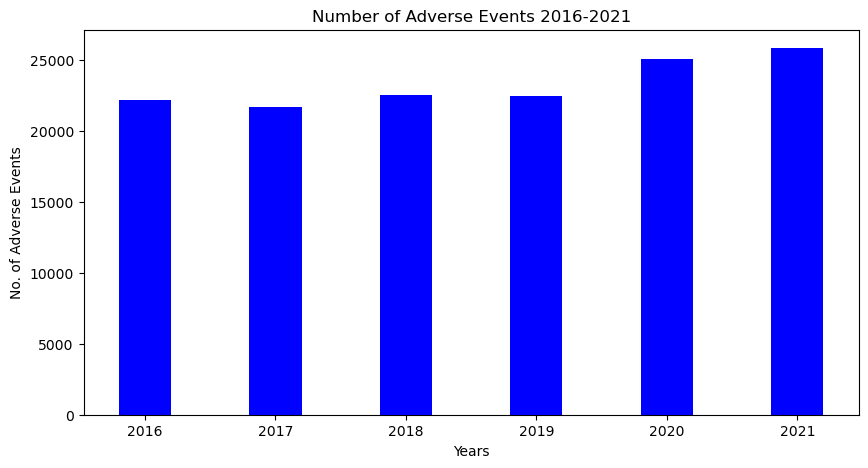

In [13]:
#Create bar chart of year_totals
# creating the dataset
data = {'2016':22190, '2017':21707, '2018':22552, 
        '2019':22465, '2020':25074, '2021':25827}
years = list(data.keys())
values = list(data.values())
 
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(years, values, color ='blue', 
        width = 0.4)


plt.xlabel("Years")
plt.ylabel("No. of Adverse Events")
plt.title("Number of Adverse Events 2016-2021")
plt.show()

In [14]:
#Drop year 
df=df.drop(['Year'], axis=1)

In [15]:
#Rename # of adverse events column
df.rename(columns={'# of Adverse Events': '#_Adverse_Events'}, inplace=True)
df

,County,OSHPDID,system,#_Adverse_Events
0,Alameda,106010735,Alameda Health System,2.0
1,Alameda,106010735,Alameda Health System,2.0
2,Alameda,106010735,Alameda Health System,5.0
5,Alameda,106010735,Alameda Health System,5.0
6,Alameda,106010735,Alameda Health System,3.0
...,...,...,...,...
25968,Yuba,106580996,Adventist Health Systems,13.0
25969,Yuba,106580996,Adventist Health Systems,3.0
25970,Yuba,106580996,Adventist Health Systems,19.0
25971,Yuba,106580996,Adventist Health Systems,16.0


In [16]:
#Look at value counts for county variable
print(df['County'].value_counts().sort_index(ascending=True))

Alameda          803
Amador            45
Butte            184
Calaveras         39
Colusa            19
Contra Costa     456
Del Norte         42
El Dorado         88
Fresno           349
Glenn             12
Humboldt         153
Imperial          93
Inyo              47
Kern             462
Kings             53
Lake              72
Lassen            29
Los Angeles     4775
Madera            43
Marin            181
Mariposa          20
Mendocino        121
Merced            90
Modoc             19
Mono              25
Monterey         221
Napa             134
Nevada            79
Orange          1393
Placer           220
Plumas            44
Riverside        964
Sacramento       564
San Benito        45
San Bernardi     871
San Diego       1065
San Francisc     563
San Joaquin      404
San Luis Obi     236
San Mateo        384
Santa Barbar     233
Santa Clara      687
Santa Cruz       118
Shasta           159
Siskiyou          81
Solano           255
Sonoma           330
Stanislaus   

In [17]:
#Get unique value count for County variable
df['County'].nunique()

55

In [18]:
#Re-express County column to numerical values and use one-hot encoding
df=pd.get_dummies(df, columns=['County'], prefix=None, drop_first=True)
df.head()

,OSHPDID,system,#_Adverse_Events,County_Amador,County_Butte,County_Calaveras,County_Colusa,County_Contra Costa,County_Del Norte,County_El Dorado,...,County_Solano,County_Sonoma,County_Stanislaus,County_Tehama,County_Trinity,County_Tulare,County_Tuolumne,County_Ventura,County_Yolo,County_Yuba
0,106010735,Alameda Health System,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,106010735,Alameda Health System,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,106010735,Alameda Health System,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,106010735,Alameda Health System,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,106010735,Alameda Health System,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#Get unique value count for system variable
print(df['system'].value_counts().sort_index(ascending=True))

AHMC Healthcare, Inc.                 326
Adventist Health Systems              808
Alameda Health System                 197
Alta Hospitals System                 210
Avanti Hospitals                      173
Cedars-Sinai Health System            209
County of Los Angeles                 234
Dignity Health                       1790
HCA Healthcare Corporation            384
Independent/Other                    5153
John Muir Health                      144
KPC Healthcare, Inc.                  354
Kaiser Foundation Hospitals          2192
Kindred Healthcare, Inc.                3
Loma Linda University                 155
MemorialCare                          237
Prime Healthcare Services             752
Providence St. Joseph Health         1175
Scripps Health                        295
Sharp Healthcare                      282
Sutter Health                        1193
Tenet Healthcare Corporation          824
Universal Health Services, Inc.       266
University of California          

In [20]:
#Get unique value counts for system
df.system.nunique()

27

In [21]:
#Rename system to System
df.rename(columns={'system': 'System'}, inplace=True)
df

,OSHPDID,System,#_Adverse_Events,County_Amador,County_Butte,County_Calaveras,County_Colusa,County_Contra Costa,County_Del Norte,County_El Dorado,...,County_Solano,County_Sonoma,County_Stanislaus,County_Tehama,County_Trinity,County_Tulare,County_Tuolumne,County_Ventura,County_Yolo,County_Yuba
0,106010735,Alameda Health System,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,106010735,Alameda Health System,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,106010735,Alameda Health System,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,106010735,Alameda Health System,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,106010735,Alameda Health System,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25968,106580996,Adventist Health Systems,13.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
25969,106580996,Adventist Health Systems,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
25970,106580996,Adventist Health Systems,19.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
25971,106580996,Adventist Health Systems,16.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
#Re-express System column to numerical values and use one-hot encoding
df=pd.get_dummies(df, columns=['System'], prefix=None, drop_first=True)
df.head()

,OSHPDID,#_Adverse_Events,County_Amador,County_Butte,County_Calaveras,County_Colusa,County_Contra Costa,County_Del Norte,County_El Dorado,County_Fresno,...,System_Providence St. Joseph Health,System_Scripps Health,System_Sharp Healthcare,System_Sutter Health,System_Tenet Healthcare Corporation,"System_Universal Health Services, Inc.",System_University of California,System_University of Southern California,System_Verity Health System,System_Vibra Healthcare
0,106010735,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,106010735,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,106010735,5.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,106010735,5.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,106010735,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#Re-examine data frame info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18386 entries, 0 to 25973
Data columns (total 82 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   OSHPDID                                   18386 non-null  int64  
 1   #_Adverse_Events                          18386 non-null  float64
 2   County_Amador                             18386 non-null  uint8  
 3   County_Butte                              18386 non-null  uint8  
 4   County_Calaveras                          18386 non-null  uint8  
 5   County_Colusa                             18386 non-null  uint8  
 6   County_Contra Costa                       18386 non-null  uint8  
 7   County_Del Norte                          18386 non-null  uint8  
 8   County_El Dorado                          18386 non-null  uint8  
 9   County_Fresno                             18386 non-null  uint8  
 10  County_Glenn                      

In [24]:
#Convert adverse events from float to int
df = df.astype({"#_Adverse_Events": float, "#_Adverse_Events": int})

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18386 entries, 0 to 25973
Data columns (total 82 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   OSHPDID                                   18386 non-null  int64
 1   #_Adverse_Events                          18386 non-null  int64
 2   County_Amador                             18386 non-null  uint8
 3   County_Butte                              18386 non-null  uint8
 4   County_Calaveras                          18386 non-null  uint8
 5   County_Colusa                             18386 non-null  uint8
 6   County_Contra Costa                       18386 non-null  uint8
 7   County_Del Norte                          18386 non-null  uint8
 8   County_El Dorado                          18386 non-null  uint8
 9   County_Fresno                             18386 non-null  uint8
 10  County_Glenn                              18386 non-null  

In [26]:
#Re-examine data frame shape
df.shape

(18386, 82)

In [27]:
#Export cleaned and prepared data set
df.to_csv(r'/Users/robertpatton/Desktop/Desktop - Robert’s MacBook Pro/D214/df_clean.csv')